# Continuous Regression ANN with PyTorch

This is a simple implementation of a Deep Learning model for regression. The wine quality dataset available in https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
# reading the red wine quality dataset
red = pd.read_csv('./datasets/winedataset/winequality-red.csv', sep=";")
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# reading the white quality dataset
white = pd.read_csv('./datasets/winedataset/winequality-white.csv', sep=";")
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# concatenating both
wines = pd.concat([red, white], ignore_index=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# suffling the dataset
wines = shuffle(wines, random_state=101)
wines.reset_index(drop=True, inplace=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.56,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,6
1,6.4,0.30,0.36,2.0,0.052,18.0,141.0,0.99273,3.38,0.53,10.5,6
2,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,7
3,7.0,0.24,0.24,1.8,0.047,29.0,91.0,0.99251,3.30,0.43,9.9,6
4,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5


In [6]:
# setting continuous columns and the prediciton column
print(wines.columns)

cont_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
y_col = 'quality'

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [7]:
# spliting test and train data
X = wines.drop(y_col,axis=1).values
print(X)
y = wines[y_col].values
print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train).reshape(-1,1)
y_test = torch.FloatTensor(y_test).reshape(-1,1)

[[ 6.8   0.56  0.22 ...  3.4   0.82 11.2 ]
 [ 6.4   0.3   0.36 ...  3.38  0.53 10.5 ]
 [ 5.9   0.17  0.29 ...  3.41  0.33 13.7 ]
 ...
 [ 8.3   0.85  0.14 ...  3.36  0.54 10.1 ]
 [ 6.3   0.6   0.1  ...  3.55  0.51 12.1 ]
 [ 7.1   0.18  0.49 ...  3.05  0.53 11.3 ]]
[6 6 7 ... 5 5 7]


In [8]:
# Creating the tabular model to the ANN Network 
# Every layer is normalized and have a Dropout Layer, the activation function chosen was ReLU
class TabularModel(nn.Module):
    
    def __init__(self, n_cont, out_sz, layers, p=0.5):
        """
        @param n_count: input number of features
        @param out_sz: output size 
        @param layers: vector of layers that are the number with number of neurons on that layer e.g. [100, 50]
        @param p: probability of Dropout layer 
        """
        super().__init__()
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_in = n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cont):
        """
        @param x_cont: continous features 
        @return x: vector of predictions
        """
        x = self.bn_cont(x_cont)
        x = self.layers(x)
        return x

In [9]:
# setting seed and defining model
# with testing the model performed best without the dropout layer
torch.manual_seed(33)
model = TabularModel(X_train.shape[1], 1, [100, 50], p=0.0)

In [10]:
#displaying model
model

TabularModel(
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=11, out_features=100, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.0)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.0)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [11]:
 # setting the Loss function and the optimizer
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [12]:
# training the model
# set the number of epochs and the loss vector
epochs = 400
losses = []

# for all epochs, pass the train set into the model, append loss and backpropate based on the error
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss)
    
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(f'epoch: {i:3}  loss: {loss.item():10.8f}') 

epoch:  1  loss: 5.90063906
epoch: 11  loss: 5.83524704
epoch: 21  loss: 5.77683115
epoch: 31  loss: 5.70411968
epoch: 41  loss: 5.61375093
epoch: 51  loss: 5.50275946
epoch: 61  loss: 5.36972952
epoch: 71  loss: 5.21309233
epoch: 81  loss: 5.03178453
epoch: 91  loss: 4.82506084
epoch: 101  loss: 4.59236288
epoch: 111  loss: 4.33344889
epoch: 121  loss: 4.04819012
epoch: 131  loss: 3.73661304
epoch: 141  loss: 3.39898109
epoch: 151  loss: 3.03548622
epoch: 161  loss: 2.64807343
epoch: 171  loss: 2.23505330
epoch: 181  loss: 1.80171239
epoch: 191  loss: 1.35637438
epoch: 201  loss: 0.91869873
epoch: 211  loss: 0.58614379
epoch: 221  loss: 0.47263068
epoch: 231  loss: 0.48183841
epoch: 241  loss: 0.46072060
epoch: 251  loss: 0.45204732
epoch: 261  loss: 0.44951284
epoch: 271  loss: 0.44539002
epoch: 281  loss: 0.44106668
epoch: 291  loss: 0.43764749
epoch: 301  loss: 0.43227467
epoch: 311  loss: 0.42715093
epoch: 321  loss: 0.42756069
epoch: 331  loss: 0.42038456
epoch: 341  loss: 0.4182

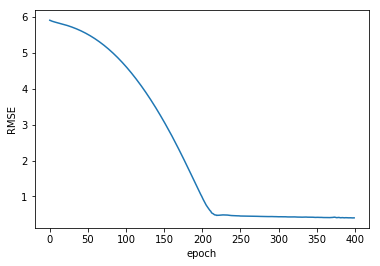

In [13]:
# plotting the loss
plt.plot(range(epochs), losses)
plt.ylabel('RMSE')
plt.xlabel('epoch');

In [14]:
# evaluatig the test set passing the test set into the trained model
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'{loss:.8f}')

0.72495717


In [15]:
# comparing predicted, actual and the difference
print(f'{"PREDICTED":>12} {"ACTUAL":>8} {"DIFF":>8}')
for i in range(len(y_test)):
    diff = np.abs(y_val[i].item() - y_test[i].item())
    print(f'{i+1:2}. {y_val[i].item():8.4f} {y_test[i].item():8.4f} {diff:8.4f}')

   PREDICTED   ACTUAL     DIFF
 1.   7.0014   8.0000   0.9986
 2.   6.8829   7.0000   0.1171
 3.   5.4176   5.0000   0.4176
 4.   5.5322   5.0000   0.5322
 5.   6.0284   6.0000   0.0284
 6.   4.8820   5.0000   0.1180
 7.   4.7219   5.0000   0.2781
 8.   5.8944   6.0000   0.1056
 9.   6.2055   7.0000   0.7945
10.   5.8876   6.0000   0.1124
11.   5.3073   5.0000   0.3073
12.   7.0485   7.0000   0.0485
13.   4.4077   5.0000   0.5923
14.   5.6212   6.0000   0.3788
15.   6.0070   5.0000   1.0070
16.   7.0746   7.0000   0.0746
17.   5.7133   5.0000   0.7133
18.   4.2244   4.0000   0.2244
19.   5.6425   6.0000   0.3575
20.   6.8485   7.0000   0.1515
21.   5.9588   6.0000   0.0412
22.   6.6115   7.0000   0.3885
23.   4.4678   5.0000   0.5322
24.   5.5667   6.0000   0.4333
25.   5.8442   7.0000   1.1558
26.   5.5314   5.0000   0.5314
27.   5.9184   6.0000   0.0816
28.   5.6382   5.0000   0.6382
29.   4.3753   5.0000   0.6247
30.   5.3026   5.0000   0.3026
31.   5.4137   6.0000   0.5863
32.   5.